# Weather Ananlyst and Report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, csv
import numpy as np

In [2]:
df = pd.read_csv("2017dbase.csv", header = None)

with open("DATA-201-Chapter3-HomeWork.csv") as file:
    line = file.readlines()[1]
headers = line.split(",")
headers[0] = "DATE"


In [3]:
df2 = df.drop(range(len(headers), len(df.columns)), axis=1)

In [4]:
df2.columns = headers
df2["DATE"]

0        201706241830
1        201706241840
2        201706241850
3        201706241900
4        201706241910
             ...     
27266    201712312310
27267    201712312320
27268    201712312330
27269    201712312340
27270    201712312350
Name: DATE, Length: 27271, dtype: int64

In [5]:
df2["DATE"] = pd.to_datetime(df[0], format="%Y%m%d%H%M")

In [6]:
df2.head()

,DATE,WIND DIR,WIND SPD,GUST,IN HUM,OUT HUM,IN TEMP,OUT TEMP,BARO,TOT RAIN,...,DEGREE DAYS HEATING DAILY,DEGREE DAYS COOLING DAILY,MOON PHASE,MONTHLY RAIN,DEGREE DAYS HEATING MONTHLY,DEGREE DAYS COOLING MONTHLY,NA,DEGREE DAYS HEATING YEARLY,DEGREE DAYS COOLING YEARLY,NA
0,2017-06-24 18:30:00,257.0,0,5,29,46.7,87.3,89.4,29.905,18.79,...,0.0,15.593,0.964,3.33,6.717,294.076,531.455,1708.934,618.861,11206.322
1,2017-06-24 18:40:00,218.0,0,3,29,46.7,87.3,88.7,29.905,18.79,...,0.0,15.767,0.972,3.33,6.717,294.250,531.509,1708.934,619.035,11206.375
2,2017-06-24 18:50:00,226.0,0,4,29,48.7,87.1,87.7,29.908,18.79,...,0.0,15.937,0.980,3.33,6.717,294.419,531.562,1708.934,619.204,11206.429
3,2017-06-24 19:00:00,246.0,0,4,29,50.7,87.1,87.0,29.916,18.79,...,0.0,16.099,0.988,3.33,6.717,294.582,531.623,1708.934,619.367,11206.489
4,2017-06-24 19:10:00,275.0,0,2,29,51.7,86.9,86.5,29.916,18.79,...,0.0,16.257,0.996,3.33,6.717,294.740,531.636,1708.934,619.524,11206.503


In [7]:
df3 = df2.drop("NA", axis=1)

In [8]:
# Use variable "DATE" as index of the data frame
df5 = df3.set_index("DATE")

In [9]:
# Access data frame using variable "DATE" as indexa dn sliding from date to date
df6 = df5["2017-09-01":"2017-09-08"]

In [10]:
# Afer fising sliding, reset index back to numeric not using variable "DATE" anymore
df7 = df6.reset_index()

In [11]:
df7.head()

,DATE,WIND DIR,WIND SPD,GUST,IN HUM,OUT HUM,IN TEMP,OUT TEMP,BARO,TOT RAIN,...,RAIN HOURLY,LAST 24 HOUR RAIN,DEGREE DAYS HEATING DAILY,DEGREE DAYS COOLING DAILY,MOON PHASE,MONTHLY RAIN,DEGREE DAYS HEATING MONTHLY,DEGREE DAYS COOLING MONTHLY,DEGREE DAYS HEATING YEARLY,DEGREE DAYS COOLING YEARLY
0,2017-09-01 00:00:00,234.0,0,0,47,76.7,80.1,75.9,29.978,31.76,...,0.0,0.0,0.0,13.318,9.913,0.0,0.023,420.521,1709.498,1657.330
1,2017-09-01 00:10:00,235.0,0,3,46,76.7,80.1,75.8,29.978,31.76,...,0.0,0.0,0.0,0.081,9.919,0.0,0.000,0.081,1709.498,1657.411
2,2017-09-01 00:20:00,234.0,0,3,47,76.7,80.1,75.7,29.972,31.76,...,0.0,0.0,0.0,0.160,9.926,0.0,0.000,0.160,1709.498,1657.491
3,2017-09-01 00:30:00,225.0,0,0,48,77.7,80.1,75.5,29.972,31.76,...,0.0,0.0,0.0,0.240,9.932,0.0,0.000,0.240,1709.498,1657.570
4,2017-09-01 00:40:00,225.0,0,0,47,76.7,80.1,75.4,29.972,31.76,...,0.0,0.0,0.0,0.317,9.938,0.0,0.000,0.317,1709.498,1657.648


In [12]:
 df7.to_csv('myfile.csv', columns=["DATE","OUT TEMP","OUT HEAT INDEX","OUT HUM RATE", "BARO", "WIND SPD"], 
            header=None, index=False, float_format='%.3f')

In [13]:
# Ceate new data frame using columns from existing data frame and append them using concat method
data = [df7["DATE"],df7["WIND CHILL RATE"],df7["MOON PHASE"],df7["WIND DIR"],df7["DEW PT RATE"]]
df_final = pd.concat(data, axis=1)

df9 = df_final.set_index("DATE")
data_of_september05 = df9["2017-09-05":"2017-09-05"]

data_of_september05 = data_of_september05.reset_index()

### Wind direction of September 05, 2017 vs entier week of September 01, 2017 through September 08, 2017

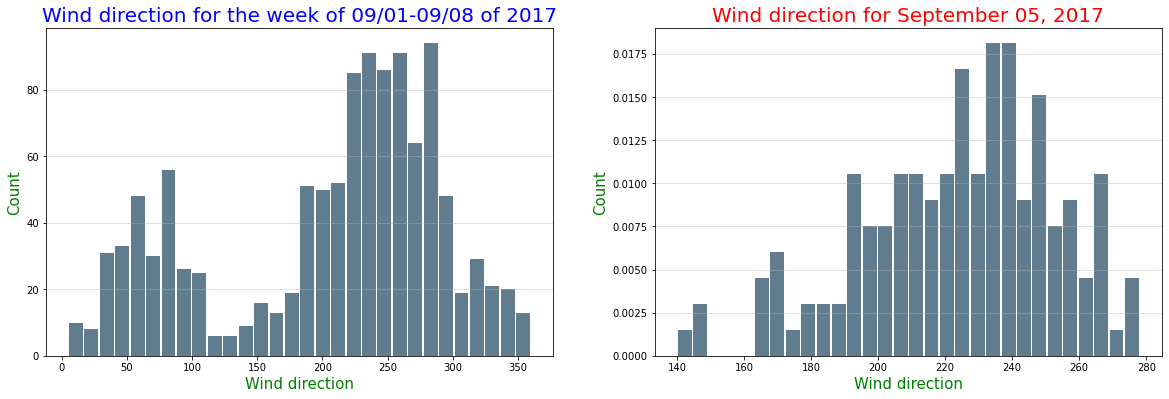

In [14]:
plt.figure(figsize = (20,35))

plt.subplot(5,2,3)
plt.hist(df_final['WIND DIR'], bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Wind direction',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Wind direction for the week of 09/01-09/08 of 2017',fontsize = 20,color = 'blue')
plt.grid(axis='y', alpha=0.5)

plt.subplot(5,2,4)
plt.hist(data_of_september05["WIND DIR"],density=True, bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Wind direction',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Wind direction for September 05, 2017',fontsize = 20,color = 'red')
plt.grid(axis='y', alpha=0.5)

### Wind chill rate vs time in September 05, 2017

Text(0.5, 0, 'Time')

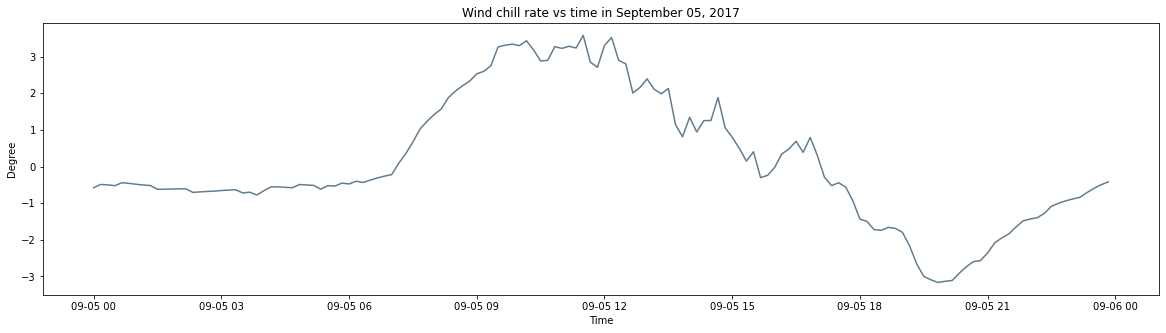

In [15]:
plt.figure(figsize = (20,5))
plt.plot(data_of_september05["DATE"],data_of_september05["WIND CHILL RATE"],color = '#607c8e')
plt.title("Wind chill rate vs time in September 05, 2017")
plt.ylabel("Degree")
plt.xlabel("Time")


### DEW PT rate for the entier week of 09/01/2017 to 09/08/2017

Text(0.5, 0, 'Time')

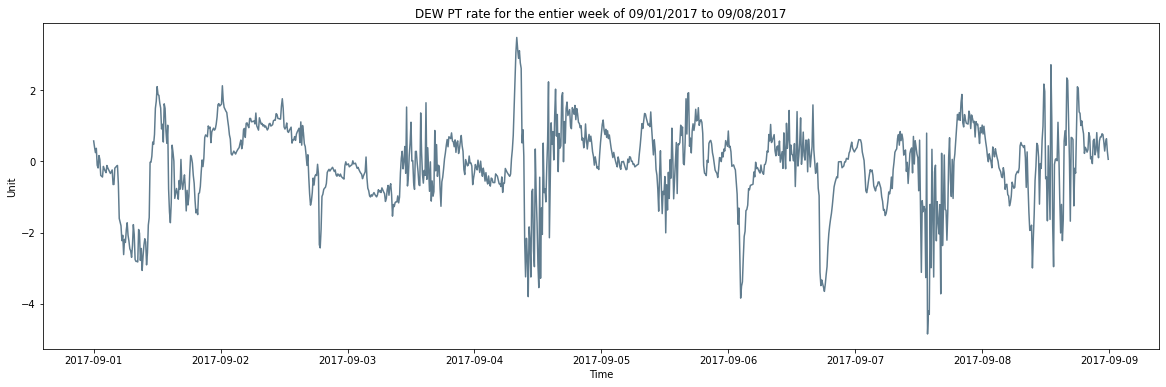

In [16]:
plt.figure(figsize = (20,6))
plt.plot(df_final["DATE"],df_final["DEW PT RATE"], color = '#607c8e')
plt.title("DEW PT rate for the entier week of 09/01/2017 to 09/08/2017")
plt.ylabel("Unit")
plt.xlabel("Time")